# Descriptive Statistics:
Mean, Median, and Mode:

In [46]:
import numpy as np 
import pandas as pd

In [47]:
#Load the dataset
df = pd.read_csv('MSFT.csv')

In [48]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-06,223.000000,225.759995,219.350006,224.929993,222.953079,43613600
1,2023-01-09,226.449997,231.240005,226.410004,227.119995,225.123856,27369800
2,2023-01-10,227.759995,231.309998,227.330002,228.850006,226.838638,27033900
3,2023-01-11,231.289993,235.949997,231.110001,235.770004,233.697815,28669300
4,2023-01-12,235.259995,239.899994,233.559998,238.509995,236.413742,27269500


In [49]:
# Summary statistics
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,315.559283,318.648686,312.696454,315.832351,314.643721,2.746283e+07
std,40.631066,40.512317,40.362838,40.413711,40.968550,1.051179e+07
min,223.000000,225.759995,219.350006,224.929993,222.953079,1.017660e+07
25%,284.510010,287.080002,282.475006,285.050003,283.252411,2.117425e+07
50%,325.660004,329.390015,323.000000,326.660004,325.309601,2.499090e+07
75%,339.000000,341.649994,335.585006,338.129989,337.113327,2.980080e+07
max,383.760010,384.299988,378.160004,382.700012,382.700012,7.847820e+07


In [50]:
# Calculate mean, median, and mode of the 'Close' prices
mean_close = df['Close'].mean()
median_close = df['Close'].median()
mode_close = df['Close'].mode()[0]

In [51]:
print("Mean Close Price:", mean_close)
print("Median Close Price:", median_close)
print("Mode Close Price:", mode_close)

Mean Close Price: 315.83235129083664
Median Close Price: 326.660004
Mode Close Price: 305.410004


In [52]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change() * 100


In [53]:
# Display daily returns
df['Daily_Return'].head()

0         NaN
1    0.973637
2    0.761717
3    3.023814
4    1.162146
Name: Daily_Return, dtype: float64

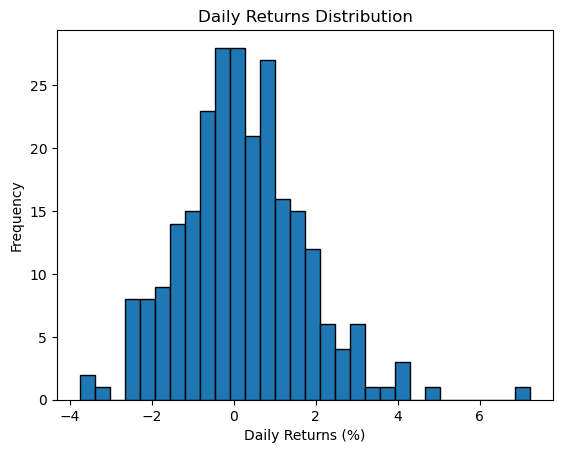

In [54]:
# Plotting the distribution of daily returns
import matplotlib.pyplot as plt
plt.hist(df['Daily_Return'].dropna(), bins=30, edgecolor='black')
plt.title('Daily Returns Distribution')
plt.xlabel('Daily Returns (%)')
plt.ylabel('Frequency')
plt.show()

# HYPOTHESIS TESTING 

In [55]:
from scipy.stats import ttest_ind

# Splitting the data into two periods (first half and second half)
midpoint = len(df) // 2
first_half_returns = df['Daily_Return'][:midpoint].dropna()
second_half_returns = df['Daily_Return'][midpoint:].dropna()

In [56]:
# Performing t-test
t_stat, p_value = ttest_ind(first_half_returns, second_half_returns)
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: 1.3544437034676673
P-Value: 0.17682758242327937


In [63]:
from scipy.stats import zscore

# Calculating Z-scores for 'Close' prices
df['Close_Zscore'] = zscore(df['Close'].dropna())

# Setting a threshold for outliers 
outliers = df[(df['Close_Zscore'] > 3) | (df['Close_Zscore'] < -3)]
print("Outliers based on Z-score:")
print(outliers[['Date', 'Close', 'Close_Zscore']])


Outliers based on Z-score:
Empty DataFrame
Columns: [Date, Close, Close_Zscore]
Index: []


In [64]:
# Calculating IQR
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1

# Finding outliers using IQR method
outliers_iqr = df[(df['Close'] < Q1 - 1.5 * IQR) | (df['Close'] > Q3 + 1.5 * IQR)]
print("Outliers based on IQR:")
print(outliers_iqr[['Date', 'Close']])


Outliers based on IQR:
Empty DataFrame
Columns: [Date, Close]
Index: []


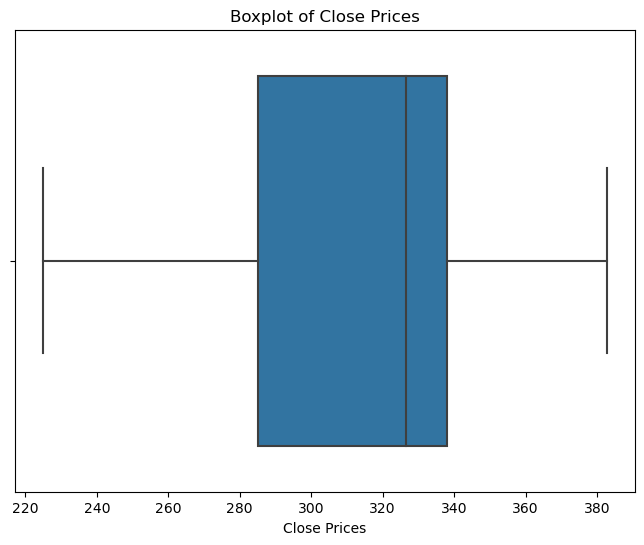

In [65]:
import seaborn as sns

# Boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Close'])
plt.title('Boxplot of Close Prices')
plt.xlabel('Close Prices')
plt.show()


It appears that based on the Z-score method, there are no outliers identified for the 'Close' prices in the Microsoft stock dataset. This could imply that the data doesn't have extreme values that fall beyond a certain threshold (commonly set at 3 standard deviations from the mean).

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Feature engineering: creating lag features
df['Close_Lag1'] = df['Close'].shift(1)  # Lag 1 day

# Selecting features and target variable
features = ['Open', 'High', 'Low', 'Volume', 'Close_Lag1']
target = 'Close'

# Removing rows with missing values created by lagging
df.dropna(inplace=True)

X = df[features]
y = df[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions
y_pred = rf_model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4.151402100444227
R-squared: 0.9975133221767103
